In [2]:
from langchain.chat_models import ChatOpenAI
from langchain_groq import ChatGroq
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain
import sympy as sympy

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [5]:
# 1. Load the LLM
llm=ChatGroq(model="llama-3.1-8b-instant",temperature=0)

In [6]:
prompt = ChatPromptTemplate.from_template(
    """
Convert the following instruction into LaTeX-compatible mathematical expressions.

❗ Return only the mathematical LaTeX expressions.
❌ Do not include explanations, descriptions, or alternative forms.
❌ Do not include words like 'Alternatively', 'using the chain rule', or English commentary.
✅ Just return valid LaTeX (without enclosing in $ or $$), one per line if there are multiple.

Instruction: {user_input}

LaTeX:
"""
)


In [7]:
# 3. Create the LangChain chain
#chain = LLMChain(llm=llm, prompt=prompt)
chain=prompt | llm

In [9]:
user_input = "Find the derivative of ln(cos(x)) with respect to x"
latex_expr = chain.invoke({"user_input": user_input}).content

In [10]:
print(latex_expr)

\frac{d}{dx} \ln(\cos(x)) = \frac{-\sin(x)}{\cos(x)}


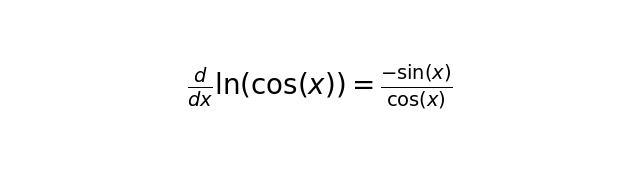

In [8]:
user_input = "Find the derivative of ln(cos(x)) with respect to x"
latex_expr = chain.invoke({"user_input": user_input}).content

# Filter only LaTeX math expressions (e.g., lines with \frac, \ln, \cos, etc.)
import re
latex_lines = [line.strip() for line in latex_expr.splitlines() if re.search(r'\\(frac|ln|cos|sin|tan)', line)]

# Choose the one you want (first one, or all)
# If you expect just one clean expression:
cleaner_expr = latex_lines[0] if latex_lines else latex_expr.strip()
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
plt.axis("off")
plt.text(0.5, 0.5, f"${cleaner_expr}$", fontsize=20, ha='center', va='center')
plt.show()


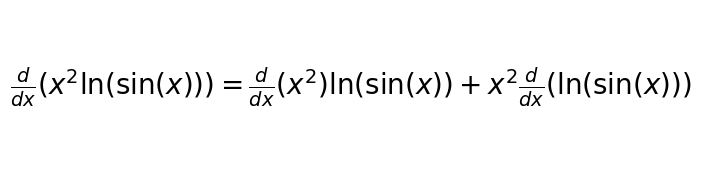

In [13]:
user_input = "Find the derivative of x^2 * ln(sin(x))"

latex_expr = chain.invoke({"user_input": user_input}).content

# Extract only LaTeX math lines using regex
import re
latex_lines = [line.strip() for line in latex_expr.splitlines() if re.search(r'\\(frac|sin|cos|tan|ln)', line)]
cleaner_expr = latex_lines[0] if latex_lines else latex_expr.strip()

# Plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 2))
plt.axis("off")
plt.text(0.5, 0.5, f"${cleaner_expr}$", fontsize=20, ha='center', va='center')
plt.show()


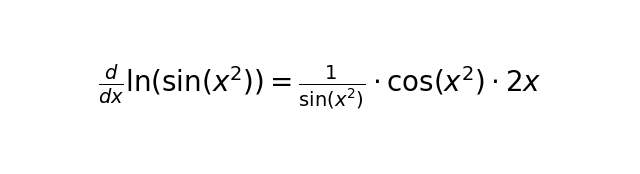

In [14]:
user_input = "Find the derivative of ln(sin(x^2))"
latex_expr = chain.invoke({"user_input": user_input}).content

# Extract only LaTeX math lines using regex
import re
latex_lines = [line.strip() for line in latex_expr.splitlines() if re.search(r'\\(frac|sin|cos|tan|ln)', line)]
cleaner_expr = latex_lines[0] if latex_lines else latex_expr.strip()

# Plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 2))
plt.axis("off")
plt.text(0.5, 0.5, f"${cleaner_expr}$", fontsize=20, ha='center', va='center')
plt.show()

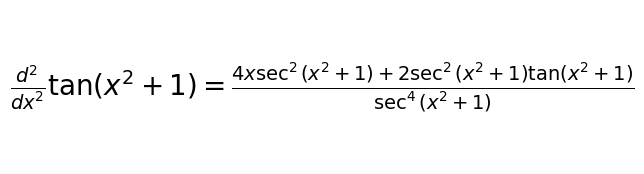

In [15]:
user_input ="Find the second derivative of tan(x^2 + 1)"

latex_expr = chain.invoke({"user_input": user_input}).content

# Extract only LaTeX math lines using regex
import re
latex_lines = [line.strip() for line in latex_expr.splitlines() if re.search(r'\\(frac|sin|cos|tan|ln)', line)]
cleaner_expr = latex_lines[0] if latex_lines else latex_expr.strip()

# Plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 2))
plt.axis("off")
plt.text(0.5, 0.5, f"${cleaner_expr}$", fontsize=20, ha='center', va='center')
plt.show()

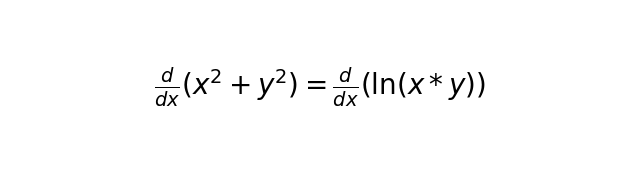

In [9]:
user_input ="Differentiate x^2 + y^2 = ln(x * y) implicitly with respect to x"
latex_expr = chain.invoke({"user_input": user_input}).content

# Extract only LaTeX math lines using regex
import re
latex_lines = [line.strip() for line in latex_expr.splitlines() if re.search(r'\\(frac|sin|cos|tan|ln)', line)]
cleaner_expr = latex_lines[0] if latex_lines else latex_expr.strip()

# Plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 2))
plt.axis("off")
plt.text(0.5, 0.5, f"${cleaner_expr}$", fontsize=20, ha='center', va='center')
plt.show()

In [14]:
from langchain.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template(
    """
Convert the following optimization problem into a LaTeX mathematical formulation.

✅ Use \\begin{{aligned}} ... \\end{{aligned}} for multi-line formatting.
✅ Format all constraints on new lines.
✅ Only output raw LaTeX — no explanation, no text.

Instruction: {user_input}

LaTeX:
"""
)


In [15]:
user_input = "Minimize the total cost of production, where cost = 5x + 3y, subject to x + y ≥ 10 and x, y ≥ 0"
latex_expr = chain.invoke({"user_input": user_input}).content

print(latex_expr)  # <- ✅ This will show the clean LaTeX block as a string


\min_{x,y} 5x + 3y
x + y \geq 10
x \geq 0
y \geq 0


In [55]:
cleaner_expr = f"\\begin{{aligned}}\n{latex_expr.strip()}\n\\end{{aligned}}"
cleaner_expr

'\\begin{aligned}\n\\min_{x,y} 5x + 3y\nx + y \\geq 10\nx \\geq 0\ny \\geq 0\n\\end{aligned}'

In [23]:
import matplotlib.pyplot as plt

user_input = (
    "Minimize total cost of transporting goods from m warehouses to n customers. "
    "Let c_ij be the cost per unit from warehouse i to customer j, and x_ij be the units transported. "
    "Each warehouse i has supply s_i, each customer j has demand d_j."
)

# Step 1: Get model output
latex_expr = chain.invoke({"user_input": user_input}).content

print(latex_expr)



\min \sum_{i=1}^{m} \sum_{j=1}^{n} c_{ij} x_{ij}
\sum_{j=1}^{n} x_{ij} \leq s_i \quad \forall i
\sum_{i=1}^{m} x_{ij} \geq d_j \quad \forall j
x_{ij} \geq 0 \quad \forall i, j


In [ ]:
# Step 2: Clean LaTeX for matplotlib mathtext (no MiKTeX)
latex_expr = latex_expr.replace(r'\begin{aligned}', '')
latex_expr = latex_expr.replace(r'\end{aligned}', '')
latex_expr = latex_expr.replace('$$', '')
latex_expr = latex_expr.replace('\n', r'\\')
latex_expr = latex_expr.replace(r'\\', r'\\' + '\n')
print(latex_expr)

In [ ]:
# Optional debug print
#print("Cleaned LaTeX Expression:\n", latex_expr)

# Step 3: Plot safely
plt.figure(figsize=(10, 3))
plt.axis("off")
plt.text(0.5, 0.5, f"${latex_expr}$", fontsize=18, ha='center', va='center')
plt.show()

In [14]:
latex_expr = r"\min \sum_{i=1}^{m} \sum_{j=1}^{n} c_{ij} x_{ij}"

# Replace LaTeX commands with readable text
readable_expr = latex_expr.replace(r"\min", "minimize") \
                          .replace(r"\sum_{i=1}^{m}", "∑_{i=1}^m") \
                          .replace(r"\sum_{j=1}^{n}", "∑_{j=1}^n") \
                          .replace(r"c_{ij}", "c_ij") \
                          .replace(r"x_{ij}", "x_ij")

print(readable_expr)

minimize ∑_{i=1}^m ∑_{j=1}^n c_ij x_ij


\min \sum_{i=1}^{m} \sum_{j=1}^{n} c_{ij} x_{ij}


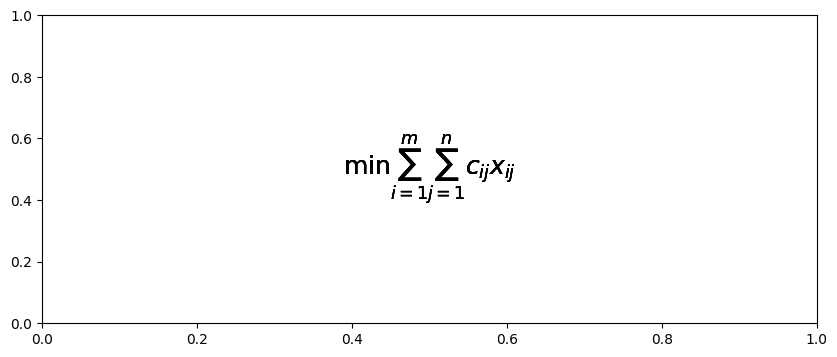

In [15]:
import matplotlib.pyplot as plt

# LaTeX-formatted equations
equations = [
    r"$\min \sum_{i=1}^m \sum_{j=1}^n c_{ij} x_{ij}$",
    r"$\sum_{j=1}^n x_{ij} \leq s_i \quad \forall i$",
    r"$\sum_{i=1}^m x_{ij} \geq d_j \quad \forall j$",
    r"$x_{ij} \geq 0 \quad \forall i,j$"
]


# Create a figure with LaTeX rendering
plt.figure(figsize=(10, 4))
print(latex_expr)
for i, eq in enumerate(equations):
    
    plt.text(0.5, 0.5, f"${latex_expr}$", fontsize=18, ha='center', va='center')
plt.show()


In [17]:
print(equations[1].replace('$', ''))

\sum_{j=1}^n x_{ij} \leq s_i \quad \forall i


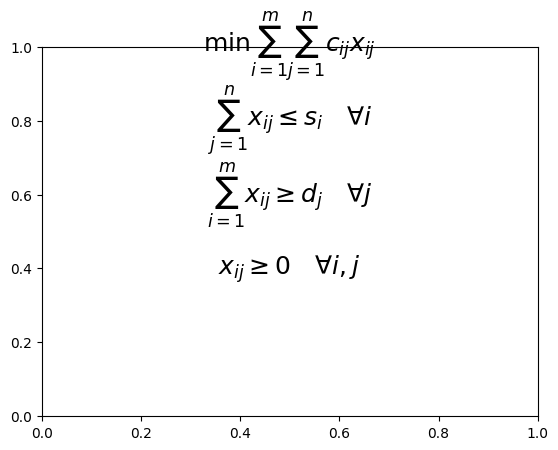

In [16]:
#matches = re.findall(r'(\\frac\{d\}\{dx\}.*?)(?=\n\s*\n|$)', equations, flags=re.DOTALL)
#print(equations[1].replace('$', ''))
for i, eq in enumerate(equations):
    plt.text(0.5, 1 - i * 0.20, f"${eq.replace('$', '') }$", fontsize=18, ha='center', va='center')
    print('\n')
plt.show()

In [50]:
for i, eq in enumerate(equations):
    print(eq)

$\min \sum_{i=1}^m \sum_{j=1}^n c_{ij} x_{ij}$
$\sum_{j=1}^n x_{ij} \leq s_i \quad \forall i$
$\sum_{i=1}^m x_{ij} \geq d_j \quad \forall j$
$x_{ij} \geq 0 \quad \forall i,j$
